In [1]:
print('Begin')

Begin


In [2]:
'''For checking 3D space velocity against the grid values'''
'''Moved everything over from the XSEDE systemspec=pyfits.open('mcrx_200.fits')
CAMERA0=spec[25]
print(CAMERA0.header)
print(CAMERA0.header['CD1_1'])
Ang=[x[0]*10**(10) for x in spec[5].data]#'''

import sys 
sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
print(sys.path)
import pyfits
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
from ppxf import ppxf
import ppxf_util as util
from matplotlib.colors import LogNorm
import glob
from time import clock

import os

#spec=pyfits.open('q0.5_fg0.3_allrx10_sunruns/mcrx_200.fits')
#My\ Passport\ for\ Mac/
print(os.getcwd())
#Below is the older version (pre absorption lines):
#os.chdir(os.path.expanduser('/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/test_Smodel_hires_testlrange2'))
os.chdir(os.path.expanduser('/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/'))
print(os.getcwd())

['', '/Users/beckynevin/anaconda/lib/python36.zip', '/Users/beckynevin/anaconda/lib/python3.6', '/Users/beckynevin/anaconda/lib/python3.6/lib-dynload', '/Users/beckynevin/anaconda/lib/python3.6/site-packages', '/Users/beckynevin/anaconda/lib/python3.6/site-packages/Sphinx-1.5.1-py3.6.egg', '/Users/beckynevin/anaconda/lib/python3.6/site-packages/aeosa', '/Users/beckynevin/anaconda/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg', '/Users/beckynevin/anaconda/lib/python3.6/site-packages/IPython/extensions', '/Users/beckynevin/.ipython', '/usr/local/lib/python2.7/site-packages', '/usr/local/lib/python2.7/site-packages/ppxf']
/Volumes/My Passport for Mac/LAURA_Sims
/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin


In [3]:
spec=pyfits.open('mcrx_200.fits')
print(spec[32].header)#spec[10] and spec[11] are camera0-parameters and camera1-

CAMERA0=spec[25]
print(CAMERA0.header)
print(CAMERA0.header['CD1_1'])
Ang=[x[0]*10**(10) for x in spec[5].data]#




XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -64 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                  300 / length of data axis 1                          NAXIS2  =                  300 / length of data axis 2                          NAXIS3  =                   10 / length of data axis 3                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     EXTNAME = 'CAMERA0-AUX'                                                         HDUVERS =                    1                                                  COMMENT This HDU contains the images of the auxiliary quantities.  The third dimCOMMENT ension runs over the different quantities, see the xxxSLICE keywords forCOMMENT  which is which.                

In [4]:
grid=pyfits.open('grid_200.fits')
print(grid['PARTICLEDATA'].header)



XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                47236 / width of table in bytes                        NAXIS2  =              2415221 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                   12 / number of fields in each row                   EXTNAME = 'PARTICLEDATA'       / name of this binary table extension            TTYPE1  = 'ID      '           / label for field                                TFORM1  = 'J       '           / format of field                                TZERO1  =           2147483648 / offset for unsigned integers                   TSCAL1  =                    1 / data ar

[    41835.51547093     41835.51547093     41835.51547093 ...,
     13945.86856155  10562134.30794222  13605724.75407805]
[[ -4.99356694  -8.70636624  -0.15280274]
 [ -4.53839726 -31.66702908 -13.08952186]
 [  5.32408086  10.7917068    4.64798255]
 ..., 
 [  4.93337411   8.48448933   0.46738974]
 [ -4.93273342  -8.57674282  -0.4479779 ]
 [  4.92300699   8.5607751    0.45560369]]
[[ -2.68241238e-07   1.06286260e-07  -1.60019774e-07]
 [  2.75001269e-08  -5.92960260e-08  -3.06404861e-08]
 [  4.05112400e-08  -1.02671677e-07  -1.23385437e-07]
 ..., 
 [ -1.15895389e-08  -4.94253130e-08   1.84269682e-07]
 [  9.38295748e-08   1.56709358e-07  -8.56147022e-08]
 [  1.32837179e-08  -1.57664964e-07   1.19107217e-08]]
2415221
3.61399483854e-07 kpc/yr
353.607738482 km/s
[ 0.02285714  0.02285714  0.02285714 ...,  0.02285714  0.02285714
  0.02285714]
<class 'pyfits.fitsrec.FITS_rec'>


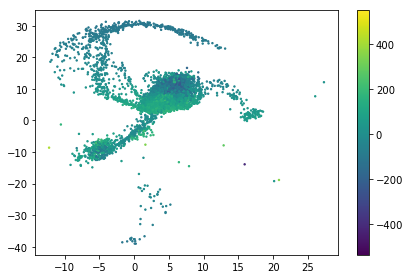

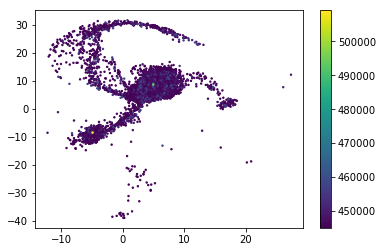

In [64]:
parts=grid['PARTICLEDATA'].data
print(parts['mass'][10:])#kpc
print(parts['position'][10:])#kpc
print(parts['velocity'][10:])#kpc/yr
print(len(parts['velocity']))
vel_3d=np.sqrt(parts['velocity'][:10][0][0]**2+parts['velocity'][:10][0][1]**2+
     parts['velocity'][:10][0][2]**2)
print(vel_3d, 'kpc/yr')
print(vel_3d*(3.086e16/3.154e7), 'km/s')
print(parts['radius'][10:])
print(type(parts))
plt.clf()

kpc_arcmin=cosmo.kpc_proper_per_arcmin(0.03)#insert the redshift to get the kpc/arcmin scaling

kpc_arcsec=(kpc_arcmin.value/60)#

xs_before=[]
ys_before=[]
vel=[]
L_bol=[]
for i in range(len(parts['velocity'])):#len(parts['velocity'])parts['velocity']
    if np.sum(parts['L_lambda'][i]) > 445000:
        xs_before.append(parts['position'][i][0])#now in arcsec
        ys_before.append(parts['position'][i][1])#now in arcsec
        L_bol.append(np.sum(parts['L_lambda'][i]))

        vel.append(parts['velocity'][i][2]*(3.086e16/3.154e7))
plt.scatter(xs_before,ys_before,c=vel, s=2)
plt.colorbar()
plt.show()

plt.scatter(xs_before,ys_before,c=L_bol, s=2)
plt.colorbar()
plt.show()




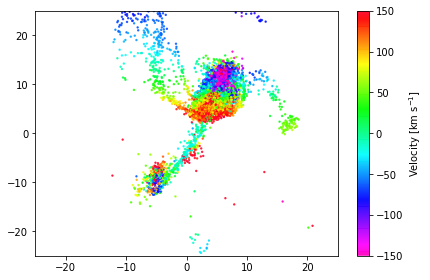

In [68]:
plt.clf()
plt.scatter(xs_before,ys_before,c=vel, vmin=-150, vmax=150,s=2, cmap='gist_rainbow_r', alpha=0.75)

plt.colorbar(label=r'Velocity [km s$^{-1}$]')
plt.xlim([-25,25])
plt.ylim([-25,25])
plt.show()

pixelscale=0.166666666666667#kpc/pixel
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(111)
im1=ax1.imshow(np.rot90(np.sum(CAMERA0.data,axis=0)), norm=LogNorm(vmin=1, vmax=1e7), cmap='Greys_r')
xs_new=[(x)/pixelscale+150 for x in xs_before]
ys_new=[-(x)/pixelscale+150 for x in ys_before]
im2=ax1.scatter(xs_new,ys_new,c=vel, vmin=-150, vmax=150,s=2, cmap='gist_rainbow_r', alpha=0.75)

cbar1=plt.colorbar(im1, label=r'Broadband Flux Density [W/m$^{2}$/sr]')
cbar2=plt.colorbar(im2)

cbar2.set_label(r'Velocity [km s$^{-1}$]', labelpad=-2)
length=300
yticks=[1 ,length/2    ,length]

ylabels=[round((x-length/2)*pixelscale,1) for x in yticks]

'''ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
ax1.set_xticks(yticks)
ax1.set_xticklabels(ylabels)
ax1.set_ylabel(r'Spatial Position [$^{\prime\prime}$]')
ax1.set_xlabel(r'Spatial Position [$^{\prime\prime}$]')'''
plt.xlim([0,300])
plt.ylim([0,300])
plt.tight_layout()
plt.savefig('../../../MaNGA_papers/Paper_I/overlap_all.pdf')

'''Now, doing the same thing but shifted to the position of our new window'''



pixelscale=0.166666666666667#kpc/pix
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(111)
im1=ax1.imshow(np.rot90(np.sum(CAMERA0.data[:,87:270,109:292],axis=0)), norm=LogNorm(vmin=1, vmax=1e7), cmap='Greys_r')
xs_new=[(x)/pixelscale+150-87 for x in xs_before]
ys_new=[-(x)/pixelscale+(150-8) for x in ys_before]
im2=ax1.scatter(xs_new,ys_new,c=vel, vmin=-150, vmax=150,s=2, cmap='gist_rainbow_r', alpha=0.75)

cbar1=plt.colorbar(im1, label=r'Broadband Flux Density [W/m$^{2}$/sr]')
cbar2=plt.colorbar(im2)

cbar2.set_label(r'Velocity [km s$^{-1}$]', labelpad=-2)
length=183
yticks=[1 ,length/2    ,length]

ylabels=[round((x-length/2)*pixelscale,1) for x in yticks]

'''ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
ax1.set_xticks(yticks)
ax1.set_xticklabels(ylabels)
ax1.set_ylabel(r'Spatial Position [$^{\prime\prime}$]')
ax1.set_xlabel(r'Spatial Position [$^{\prime\prime}$]')'''
plt.xlim([0,183])
plt.ylim([0,183])
plt.tight_layout()
plt.savefig('../../../MaNGA_papers/Paper_I/overlap_window.pdf')


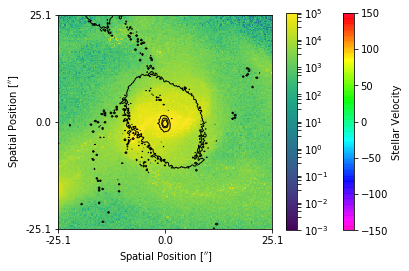

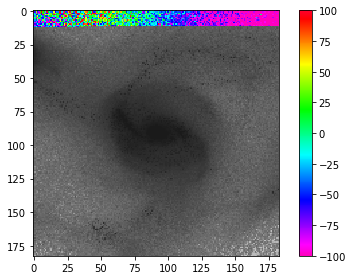

(masked_array(data =
  [[-91.48 22.93 8.69 ..., -91.88 -63.81 -101.12]
  [131.44 -62.29 46.08 ..., -149.17 -121.62 -149.72]
  [-19.13 -28.89 -87.57 ..., -138.96 -84.59 -103.09]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]],
              mask =
  [[False False False ..., False False False]
  [False False False ..., False False False]
  [False False False ..., False False False]
  ..., 
  [ True  True  True ...,  True  True  True]
  [ True  True  True ...,  True  True  True]
  [ True  True  True ...,  True  True  True]],
        fill_value = 1e+20), masked_array(data =
  [[0.4 0.3 0.35 ..., 0.03 0.31 0.26]
  [0.7 0.26 0.56 ..., 0.24 0.24 0.32]
  [0.45 0.32 0.25 ..., 0.27 0.32 0.05]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]],
              mask =
  [[False False False ..., False False False]
  [False False False ..., False False False]
  [False False False ..., False False False]
  ..., 
  [ True  

In [123]:
#plotting_maps_janky('Figs/kinemetry_input_append_10.txt', 60)#was 7
plotting_maps_janky('Figs/kinemetry_input_append_14.txt', 183)

In [120]:
def plotting_maps_janky(file_path, size):
    #First, break down the kinemetry file
    
    with open(file_path, 'r') as f:
        data = f.readlines()
        #print(data)
        stel_vel=np.zeros((size,size))
        stel_vel_e=np.zeros((size,size))
        stel_disp=np.zeros((size,size))
        stel_disp_e=np.zeros((size,size))
        
        
        for line in data:
            words = line.split()
 
            if (words[0]) != 'Beginning':
 
             
                xs=int(round(float(words[0]),0))
                ys=int(round(float(words[1]),0))
            
                '''if float(words[2]) != 0 and float(words[4]) != 0:
            
                    if abs(float(words[3])/float(words[2])) < 10 and abs(float(words[5])/float(words[4])) < 10:
                     '''   
                if float(words[2]) !=0:
                    
                    if abs(float(words[3])/float(words[2])) < 1:
                        stel_vel[xs,ys] = float(words[2])
                        stel_vel_e[xs,ys] = float(words[3])

                        stel_disp[xs,ys] = float(words[4])
                        stel_disp_e[xs,ys] = float(words[5])
                    else:
                        stel_vel[xs,ys] = 0
                        stel_vel_e[xs,ys] = 0

                        stel_disp[xs,ys] = 0
                        stel_disp_e[xs,ys] = 0
                else:
                    stel_vel[xs,ys] = 0
                    stel_vel_e[xs,ys] = 0

                    stel_disp[xs,ys] = 0
                    stel_disp_e[xs,ys] = 0
                    
                
                
                
                

    #masked_stel_vel=np.ma.masked_where(abs(stel_vel_e/stel_vel) > 1, stel_vel)
    masked_stel_vel = np.ma.masked_where(stel_vel == 0, stel_vel)
    #masked_stel_vel = np.ma.masked_where(abs(stel_vel_e/stel_vel) > 0.01, masked_stel_vel)
    #masked_stel_vel = np.ma.masked_where(abs(stel_disp_e/stel_disp) > 0.1, masked_stel_vel)
    masked_stel_vel_e = np.ma.masked_where(stel_vel==0, stel_vel_e)
    
    #masked_disp = np.ma.masked_where(abs(stel_disp_e/stel_disp) > 1, stel_disp)
    masked_disp = np.ma.masked_where(stel_disp ==0, stel_disp)
    masked_disp_e = np.ma.masked_where(stel_disp==0, stel_disp_e)
    '''plt.imshow(np.fliplr(np.flipud(masked_stel_vel)), vmin=-150, vmax=150)
    plt.colorbar()
    plt.show()
    plt.clf()
    '''
    '''What about making it look pretty with pixelsize?'''
    
    kpc_arcmin=cosmo.kpc_proper_per_arcmin(0.03)#insert the redshift  
    #MaNGA's pixels are 0.5 arcseconds

    pixelscale=0.16666
    
    pixsize = pixelscale / (kpc_arcmin.value/60)
    
    '''Make labels'''
    '''fig = plt.figure()
    ax1 = fig.add_subplot(211, aspect='equal')
    ax1.set_title('Stellar Velocity')
    
    im1=ax1.imshow(((masked_stel_vel)), vmin=-150, vmax=150, cmap='gist_rainbow_r')
    
    yticks=[0,75,150,150+75,300]
    yticks=[0 ,size/2    ,size]
    ylabels=[round((x-size/2)*pixsize,1) for x in yticks]
    #ax1.set_yticks(yticks)
    #ax1.set_yticklabels(ylabels)
    #ax1.set_xticks(yticks)
    #ax1.set_xticklabels(ylabels)
    #ax1.set_ylabel(r'Spatial Position [$^{\prime \prime}$]')
    #ax1.set_xlabel(r'Spatial Position [$^{\prime \prime}$]')
    plt.colorbar(im1, orientation='vertical')
    
    ax2 = fig.add_subplot(221, aspect='equal')
    ax2.set_title('Stellar Dispersion')
    
    im2=ax2.imshow(((masked_disp)), vmin=0, vmax=300, cmap='gist_rainbow_r')
    
    yticks=[0,75,150,150+75,300]
    yticks=[0 ,size/2    ,size]
    ylabels=[round((x-size/2)*pixsize,1) for x in yticks]
    #ax1.set_yticks(yticks)
    #ax1.set_yticklabels(ylabels)
    #ax1.set_xticks(yticks)
    #ax1.set_xticklabels(ylabels)
    #ax1.set_ylabel(r'Spatial Position [$^{\prime \prime}$]')
    #ax1.set_xlabel(r'Spatial Position [$^{\prime \prime}$]')
    plt.colorbar(im2, orientation='vertical')
    fig.tight_layout()
    plt.show()'''
    
    
    y=extract_spec_x_cut(87,270,109,292 ,size)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, aspect='equal')
    #
    im1 = ax1.imshow((np.sum(y, axis=0)),norm=LogNorm(vmin=0.001, vmax=10**5), alpha=0.9, cmap='Greys')
    im2 = ax1.imshow(((masked_stel_vel)), vmin=-100, vmax=100, cmap='gist_rainbow_r')
    plt.colorbar(im2, orientation='vertical')
    fig.tight_layout()
    plt.show()
    
    
    x = np.arange(0, size, 1)
    y1 = np.arange(0, size, 1)
    
    X, Y = np.meshgrid(x, y1)
    #np.rot90(np.sum(CAMERA0.data[:,87:270,109:292],axis=0)
    
    
    Z = np.array(np.rot90(np.sum(CAMERA0.data[:,87:270,109:292],axis=0)))
    
    
    
    
    levels = np.arange(10**4, 10**5.5, 10**5)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, aspect='equal')
    im1 = ax1.contour(X, Y, Z, levels, colors='black', linewidths=1)
    
    
    im2 = ax1.imshow(np.rot90(masked_stel_vel),vmin=-150, vmax=150,  cmap='gist_rainbow_r', alpha=0.75)
    plt.colorbar(im2, orientation='vertical', label='Stellar Velocity')
    #fig.tight_layout()
    yticks=[0 ,size/2    ,size]
    ylabels=[round((x-size/2)*pixsize,1) for x in yticks]
    ax1.set_yticks(yticks)
    ax1.set_yticklabels(ylabels)
    ax1.set_xticks(yticks)
    ax1.set_xticklabels(ylabels)
    ax1.set_ylabel(r'Spatial Position [$^{\prime \prime}$]')
    ax1.set_xlabel(r'Spatial Position [$^{\prime \prime}$]')
    #plt.tight_layout()
    
    convert_x=[x for x in xs_new]
    convert_y=[x for x in ys_new]#was xs_before and ys_before
    #im3=ax1.scatter(convert_x,convert_y,c=vel, vmin=-150, vmax=150,s=2, cmap='gist_rainbow_r', alpha=0.75)
    #plt.colorbar(im3, orientation='vertical', label='Stellar Velocity')
    plt.xlim([0, size])
    plt.ylim([0, size])
    plt.savefig('../../../MaNGA_papers/Paper_I/stel_vel_overlay_ppxf_mcrx_14.pdf')
    
    
    return masked_stel_vel, masked_stel_vel_e, masked_disp, masked_disp_e, pixsize
    

In [119]:
print(np.mean(vel))

15.7441157932


In [71]:
def extract_spec_x_cut(xmin,xmax, ymin,ymax, size):
    data_new=CAMERA0.data[:,xmin:xmax,ymin:ymax]
    plt.imshow(np.sum(data_new, axis=0),norm=LogNorm(vmin=0.001, vmax=10**5))
    plt.colorbar()
    plt.show()
    
    
    return data_new

def extract_spec_x_old( xmax, ymin, factor):
    
    '''If the length divided by the factor is not an integer stop everything!'''
    
    
    plt.clf()
    
    
    if ((len(CAMERA0.data[0,:,0])/factor).is_integer()):
        length=int(len(CAMERA0.data[0,:,0])/factor)
    else:
        stop
    
    
    data_new = np.zeros((len(CAMERA0.data[:,0,0]), length, length))
    
    
    '''plt.imshow(np.sum(CAMERA0.data, axis=0),norm=LogNorm(vmin=0.001, vmax=10**5))
    plt.colorbar()
    plt.show()'''
    
    
   
    data_new += CAMERA0.data[:, ::factor, ::factor] + CAMERA0.data[:, 1::factor, ::factor] + CAMERA0.data[:, ::factor, 1::factor] + CAMERA0.data[:, 1::factor, 1::factor]# Take (0,0)
    #data_new += CAMERA0.data[:, 1::2, ::2]  # Take (1,0)
    #data_new += CAMERA0.data[:, ::2, 1::2]  # Take (0,1)
    #data_new += CAMERA0.data[:, 1::2, 1::2] # Take (1,1)
    print('~~~~')
    
    plt.imshow(np.sum(data_new, axis=0),norm=LogNorm(vmin=0.001, vmax=10**5))
    plt.colorbar()
    plt.show()
    
    
    '''plt.plot(CAMERA0.data[:,0,0]+CAMERA0.data[:,0,1]+CAMERA0.data[:,1,0]+CAMERA0.data[:,1,1])
    plt.show()
    
    
    
    plt.plot(data_new[:,0,0])
    plt.show()'''
    return data_new

### print('done')

In [62]:
snaps='../../q0.5_fg0.3_allrx10/snapshot_200.hdf5'

import h5py
f = h5py.File(snaps, 'r')
print("Keys: %s" % f.keys())

for k in f.keys():print(f[k])
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)
    
set1=f['PartType0']
print(set1)


import h5py    # HDF5 support

fileName = "../../q0.5_fg0.3_allrx10/snapshot_200.hdf5"
f = h5py.File(fileName,  "r")
for item in f.attrs.keys():
    print(item + ":", f.attrs[item])
mr = f['PartType0']
print(np.shape(mr))
print(mr)
i00 = f['PartType1']
print("%s\t%s\t%s" % ("#", "mr", "I00"))
for i in range(len(mr)):
    print("%d\t%g\t%d" % (i, i, i))#, mr[i]))#, i00[i]))
#f.close()


Keys: KeysView(<HDF5 file "snapshot_200.hdf5" (mode r)>)
<HDF5 group "/Header" (0 members)>
<HDF5 group "/PartType0" (12 members)>
<HDF5 group "/PartType1" (5 members)>
<HDF5 group "/PartType2" (5 members)>
<HDF5 group "/PartType4" (7 members)>
<HDF5 group "/PartType5" (10 members)>
Header
PartType0
PartType1
PartType2
PartType4
PartType5
<HDF5 group "/PartType0" (12 members)>
(12,)
<HDF5 group "/PartType0" (12 members)>
#	mr	I00
0	0	0
1	1	1
2	2	2
3	3	3
4	4	4
5	5	5
6	6	6
7	7	7
8	8	8
9	9	9
10	10	10
11	11	11
